In [ ]:
# Start with Title Box

In [1]:
import numpy as np
import math
import pandas as pd
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

import easyocr
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [2]:
# Making a list of image path
 
drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_1'
drg_image_1 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_1/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_2'
drg_image_2 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_2/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_3'
drg_image_3 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_3/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_4'
drg_image_4 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_4/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_5'
drg_image_5 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_5/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_6'
drg_image_6 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_6/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_7'
drg_image_7 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_7/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_8'
drg_image_8 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_8/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_9'
drg_image_9 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_9/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_10'
drg_image_10 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_10/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_image = drg_image_1+drg_image_2+drg_image_3+drg_image_4+drg_image_5+drg_image_6+drg_image_7+drg_image_8+drg_image_9+drg_image_10
drg_image.sort() # Sorting the list

#num_images = len(drg_image_1) +len(drg_image_2) + len(drg_image_3) + len(drg_image_4)
num_images = len(drg_image)

print('Number of images = ', num_images)


Number of images =  410


(629, 1213)


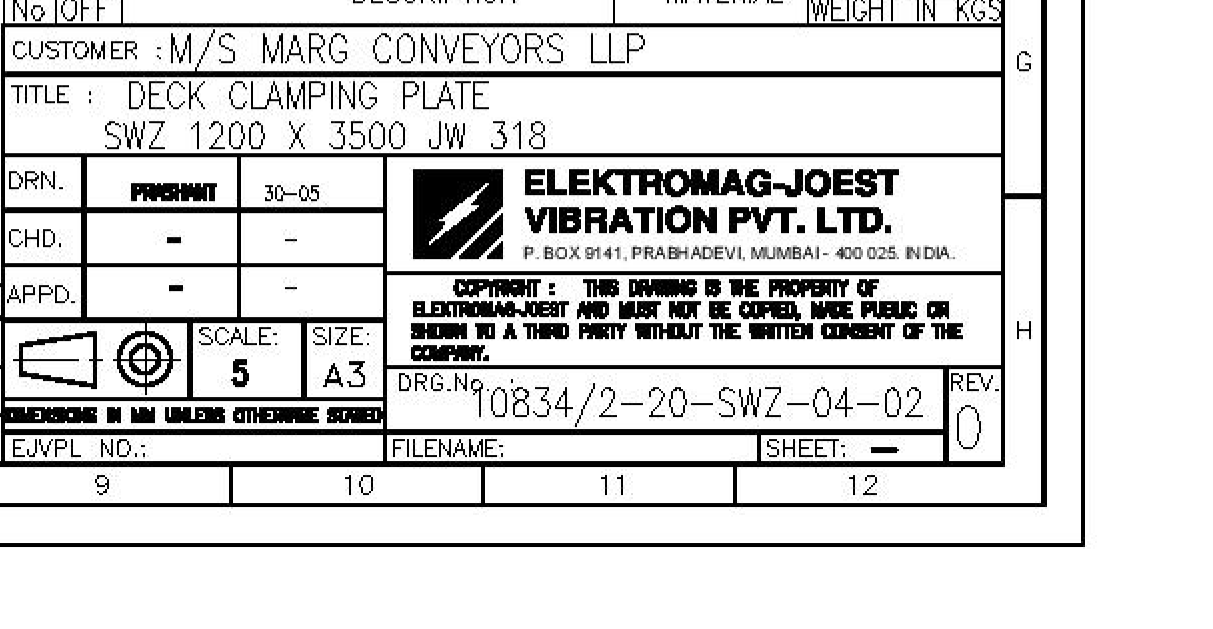

In [35]:
## locating the title block :

x = cv2.imread(drg_image[409], cv2.IMREAD_GRAYSCALE)

dim = (3508, 2479)
x_resized = cv2.resize(x, dim, interpolation = cv2.INTER_AREA)

title_block = x_resized[1850:2479, 2295:3508]   
print(title_block.shape)
x_pil = Image.fromarray(title_block)
display(x_pil)

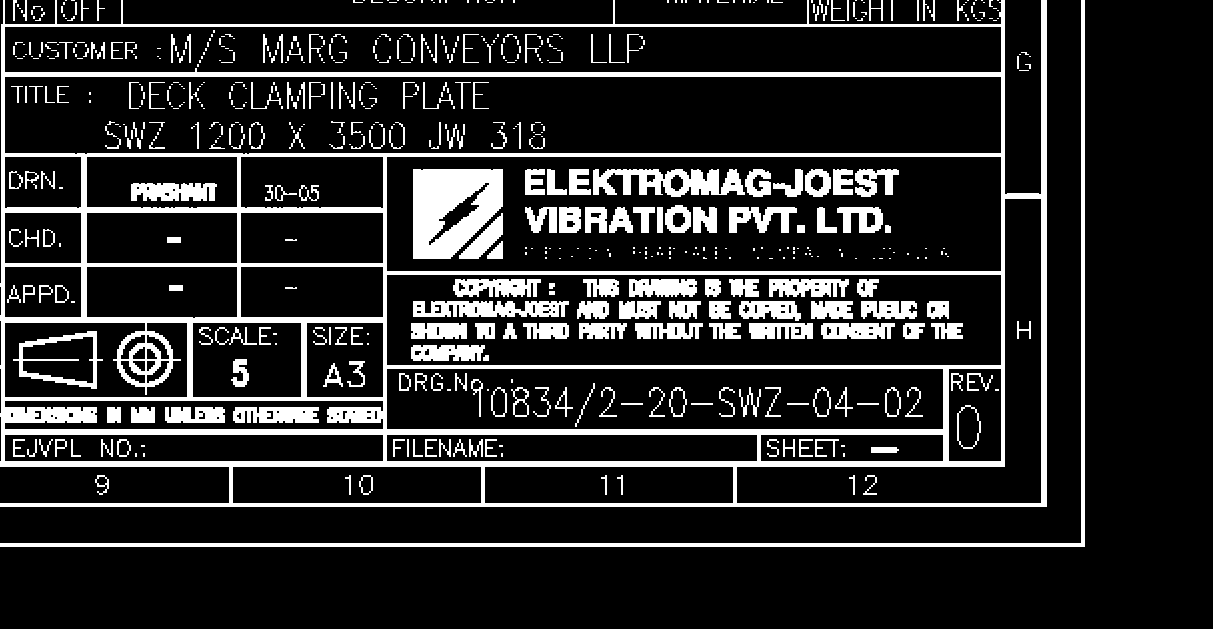

In [86]:
ret,thresh = cv2.threshold(title_block,50,255,cv2.THRESH_BINARY_INV)

kernel = np.ones((1,1),np.uint8)
title_block_eroded = cv2.erode(thresh,kernel,iterations = 1)

x_pil = Image.fromarray(title_block_eroded)
display(x_pil)

In [16]:
x_pil = Image.fromarray(title_block_eroded[17:25, 0:7])
display(x_pil)

In [17]:
title_block_eroded[17:25, 0:7]

array([[  0,   0, 255, 255,   0,   0,   0],
       [  0,   0, 255, 255,   0,   0,   0],
       [  0,   0, 255, 255,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255,   0,   0,   0],
       [  0,   0, 255, 255,   0,   0,   0],
       [  0,   0, 255, 255,   0,   0,   0]], dtype=uint8)

In [87]:
pd_title_block = pd.DataFrame(title_block_eroded)  # creating a dataframe with eroded pixel values which are either 0(black) or 255(white)
pd_title_block.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212
0,0,0,0,255,255,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,255,255,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,255,255,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# count how many '0's and '255's are there row-wise & keep in a df. this give  cols - one for '0'count & other for '255'count
pd_t_b_row = pd_title_block.apply(pd.Series.value_counts, axis=1).fillna(0)
pd_t_b_row.head()

,0,255
0,1073.0,140.0
1,1111.0,102.0
2,1033.0,180.0
3,1149.0,64.0
4,1139.0,74.0


In [89]:
pd_title_block.insert(loc=0, column='v_255', value=pd.Series(pd_t_b_row[255]))  # only '255'counts in pd_t_b_row is added
pd_title_block.columns = range(0, (title_block_eroded.shape[1]+1), 1)           # reindex the columns
pd_title_block.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213
0,140.0,0,0,0,255,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,102.0,0,0,0,255,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180.0,0,0,0,255,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
pd_title_block.head(30)

,0,1,2,3,4,5,6,7,8,9,...,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213
0,77.0,0,0,0,0,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56.0,0,0,0,0,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,56.0,0,0,0,0,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,0,0,0,0,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36.0,0,0,0,0,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,35.0,0,0,0,0,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,35.0,0,0,0,0,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,40.0,0,0,0,0,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,40.0,0,0,0,0,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,42.0,0,0,0,0,255,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# find ist row where '255's are very high - kept limit as 80% of image width

limit = title_block_eroded.shape[1]*.80
idx = pd_title_block[pd_title_block[0] > limit].index[0]
kount = pd_title_block[0][idx]

# row no. of main image where title block top line exists :
print(kount)
drg_t_b_idx = 1850 + idx
print(drg_t_b_idx)

1014.0
1874


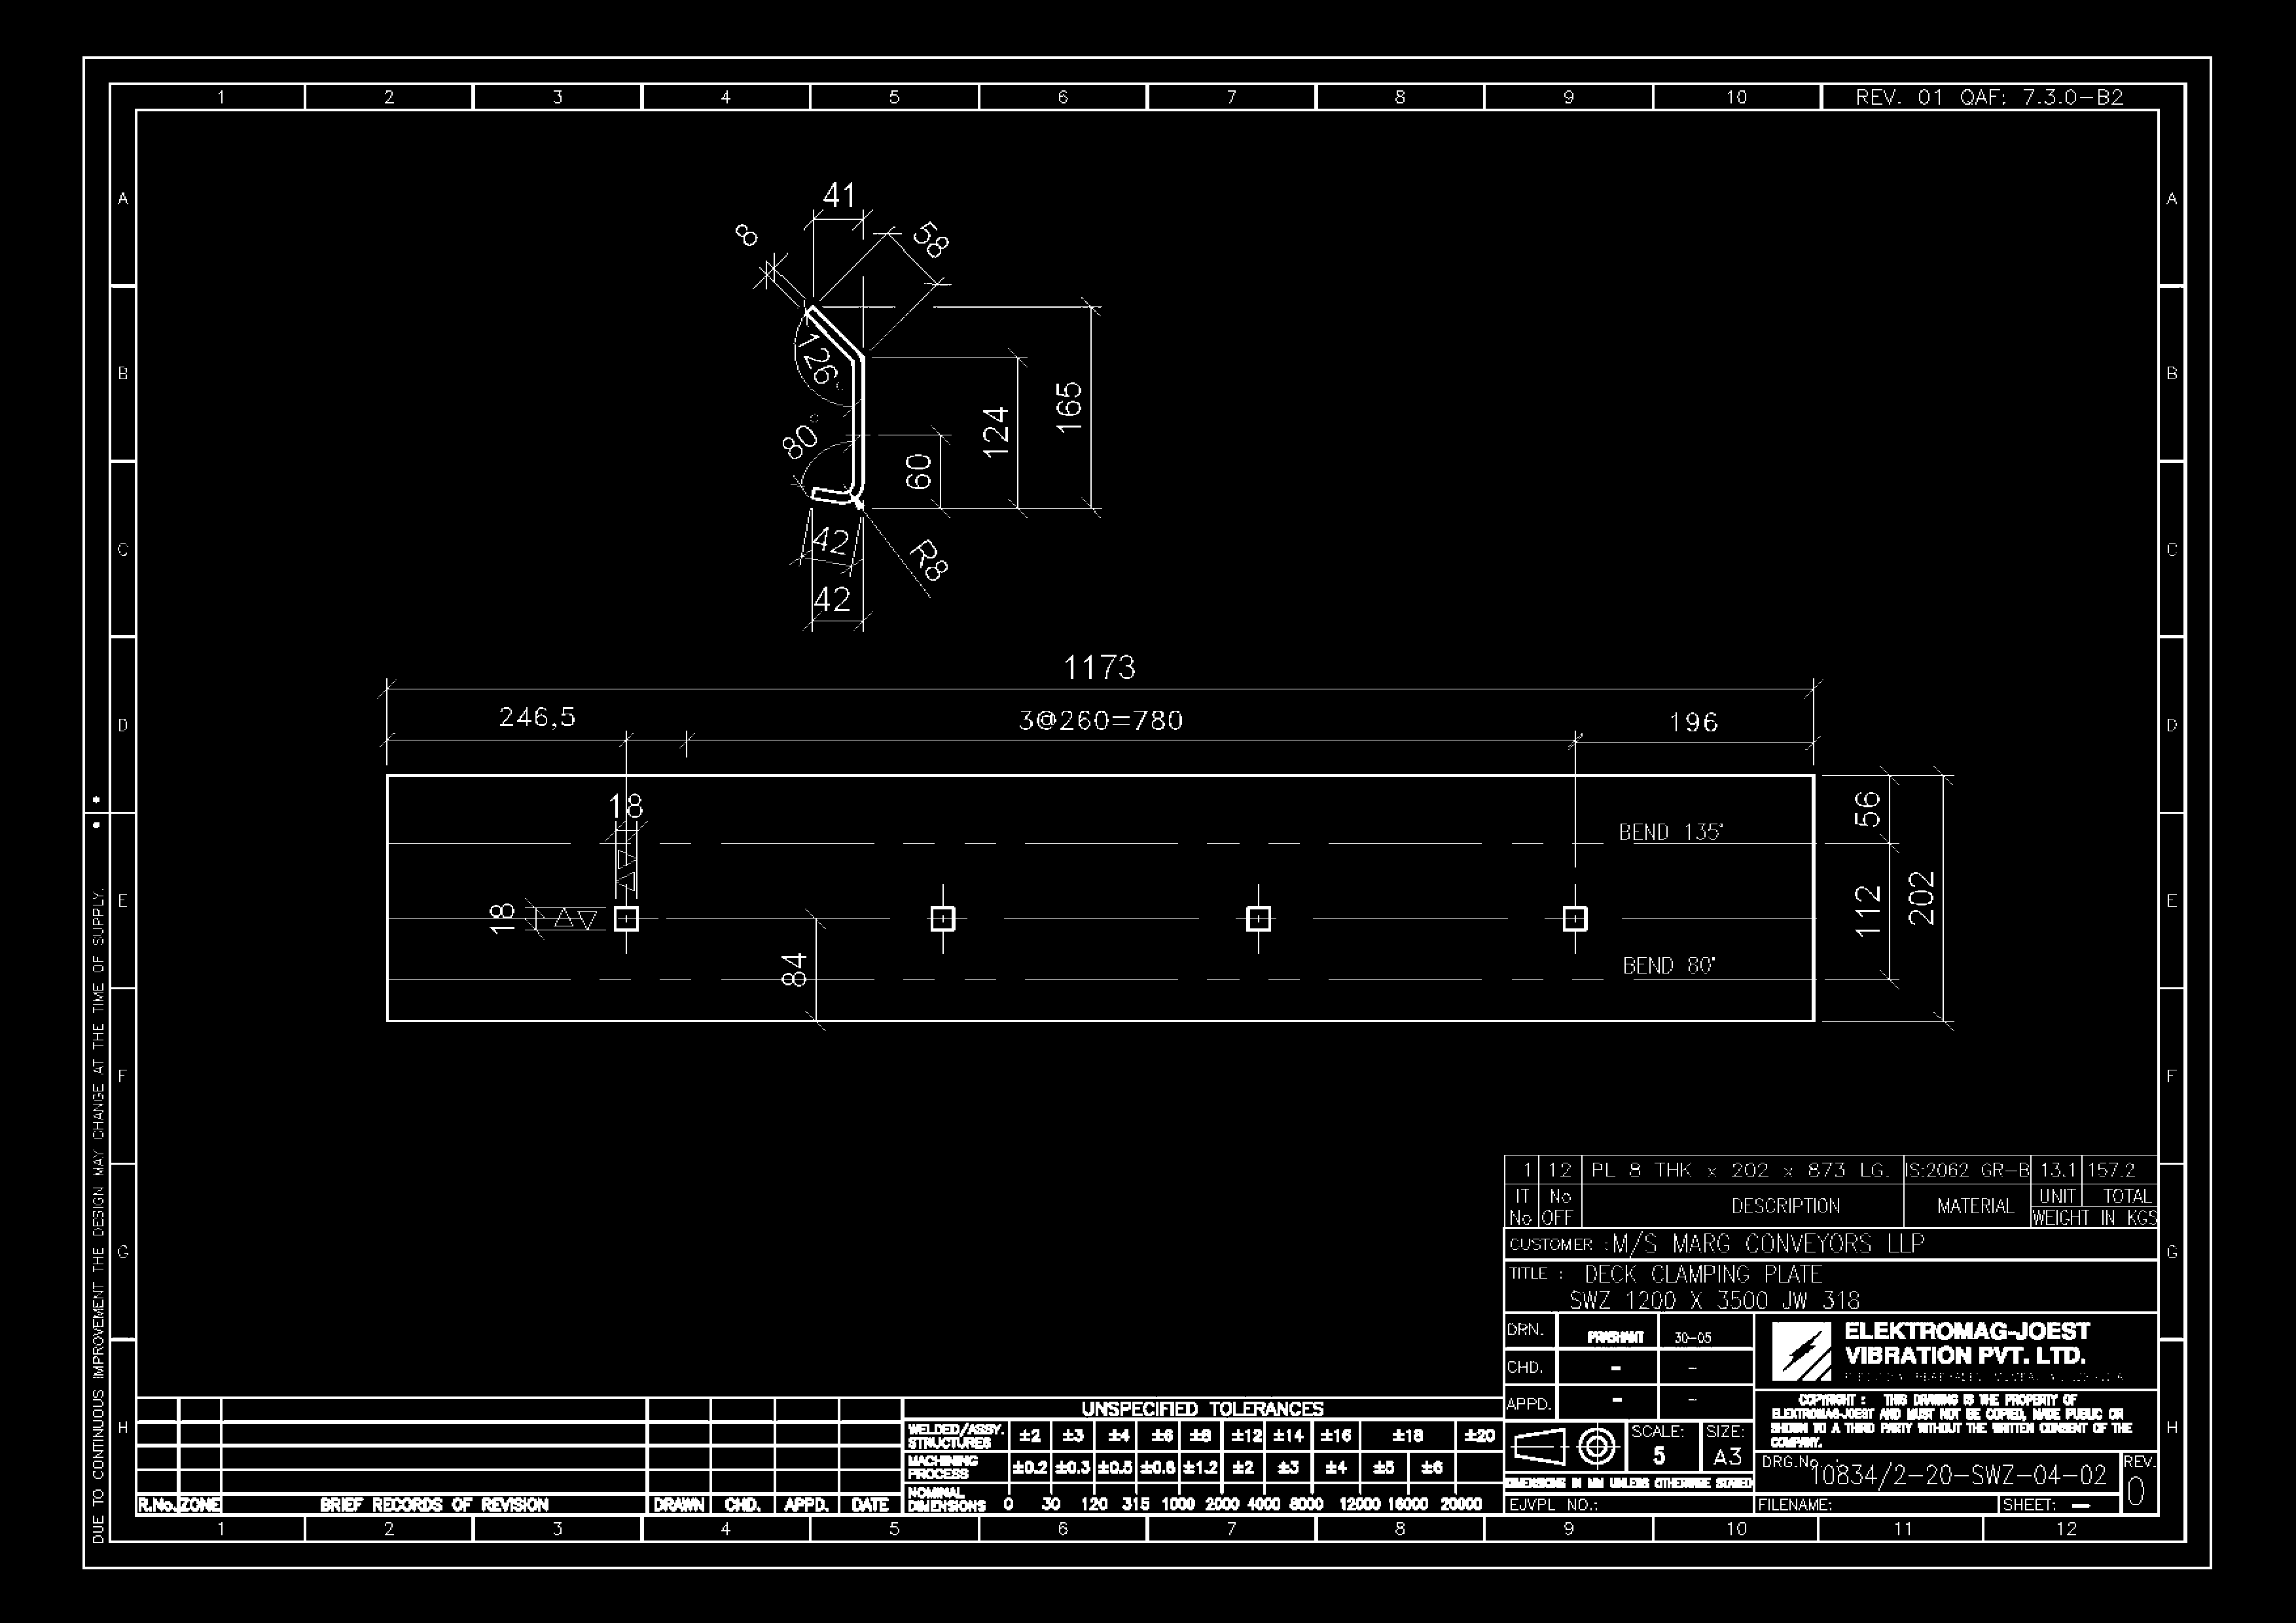

In [91]:
ret_1,thresh_1 = cv2.threshold(x_resized,50,255,cv2.THRESH_BINARY_INV)

kernel = np.ones((1,1),np.uint8)
image_eroded = cv2.erode(thresh_1,kernel,iterations = 1)

x_pil = Image.fromarray(image_eroded)
display(x_pil)

In [92]:
image_eroded[1873:1878, 2296:3301]


array([[  0,   0, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0]], dtype=uint8)

In [ ]:
# find index of hor. lines above top t.b. line, whose '255'counts are equal or more than kount above
# find whether top t.b. line extends on left side.
